In [3]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.5 MB/s eta 0:00:00


In [4]:
# %% Imports
from utils import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [5]:
# %% Load and preprocess data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(7778, 21)
(1022, 21)


In [6]:
# %% Fit blackbox model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5342599524755053
Accuracy 0.9452054794520548


In [7]:
# %% Create SHAP explainer
explainer = shap.TreeExplainer(rf)
# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
2813,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,43.0,0,0,91.13,33.9


In [8]:
# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

(1, 21)


[array([[ 7.69929824e-03,  6.79201659e-03, -3.07242284e-07,
         -2.27588203e-03, -4.61705293e-03, -3.13865746e-04,
         -3.50526852e-05,  3.32707010e-03,  9.61969537e-03,
         -3.75402635e-03,  5.60783668e-03,  5.95519575e-03,
         -4.23009951e-04,  1.78966008e-02,  1.75305242e-02,
          4.81365341e-03,  2.35416157e-01,  1.31721026e-02,
          8.79155464e-03,  9.53397387e-02,  7.97418876e-02]]),
 array([[-7.69929824e-03, -6.79201659e-03,  3.07242284e-07,
          2.27588203e-03,  4.61705293e-03,  3.13865746e-04,
          3.50526852e-05, -3.32707010e-03, -9.61969537e-03,
          3.75402635e-03, -5.60783668e-03, -5.95519575e-03,
          4.23009951e-04, -1.78966008e-02, -1.75305242e-02,
         -4.81365341e-03, -2.35416157e-01, -1.31721026e-02,
         -8.79155464e-03, -9.53397387e-02, -7.97418876e-02]])]

The RF predicted: 0


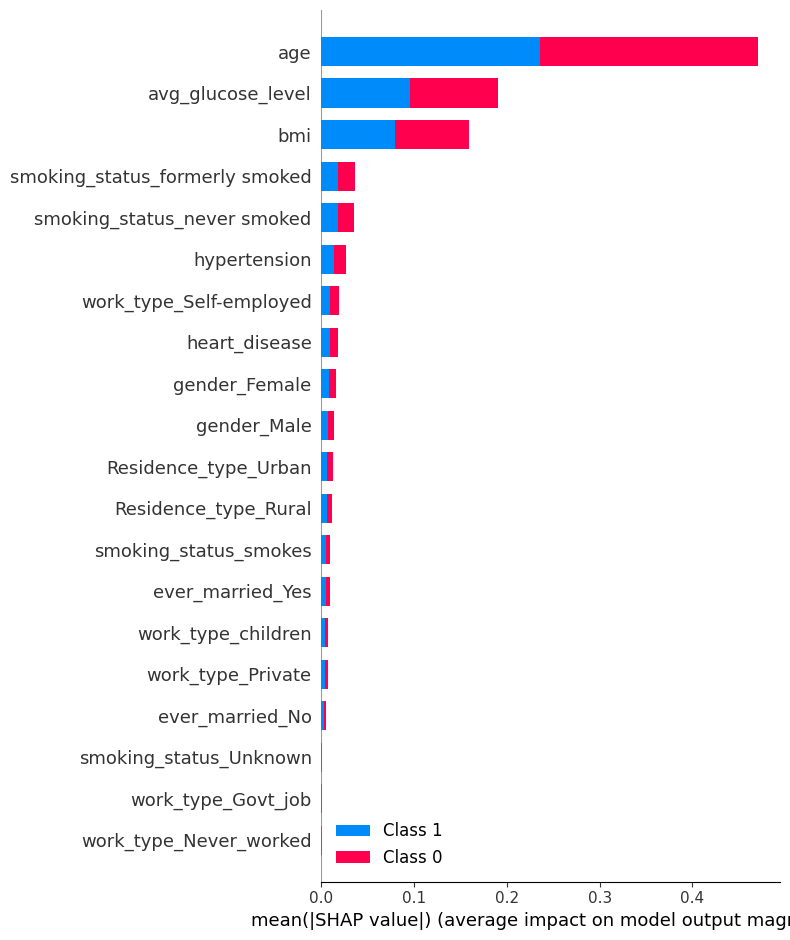

In [9]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values

# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values, X_test)
